In [86]:

import pandas as pd # For data manipulation
import os # Get the current working directory
import dill # For saving and loading Python objects
import matplotlib.pyplot as plt # For plotting
import seaborn as sns

In [43]:
os.chdir('/Users/daniil/Library/CloudStorage/OneDrive-IndianaUniversity/Documents/Experiments/IU/Memorability Rocks/Exp1/Exp1_analysis') # Change to the directory where the data is stored

In [ ]:
# Load and automatically restore all variables to global namespace
with open("Exp1_analysis.pkl", "rb") as f:
    loaded_vars = dill.load(f)
    globals().update(loaded_vars)

print(f"Loaded {len(loaded_vars)} variables:", list(loaded_vars.keys()))

In [45]:
# Load data
data_set = pd.read_json('Data/Group1_test4.json')
data_set.tail(50)

,success,timeout,failed_images,failed_audio,failed_video,trial_type,trial_index,plugin_version,time_elapsed,subject_id,...,task,broad_category,image_png,image_id,category_name,category,distinct_rating,correct_response,item_type,cor_ans
1394,NaN,NaN,NaN,NaN,NaN,image-keyboard-response,1394,2.1.0,2917269,4loro8em,...,test_phase,I,I_Basalt_06.png,22.0,Basalt,2.0,2.08,a,Foil,0.0
1395,NaN,NaN,NaN,NaN,NaN,html-keyboard-response,1395,2.1.0,2917770,4loro8em,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1396,NaN,NaN,NaN,NaN,NaN,image-keyboard-response,1396,2.1.0,2918275,4loro8em,...,test_phase,M,M_Anthracite_07.png,183.0,Anthracite,12.0,4.27,l,Target,0.0
1397,NaN,NaN,NaN,NaN,NaN,html-keyboard-response,1397,2.1.0,2918777,4loro8em,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1398,NaN,NaN,NaN,NaN,NaN,image-keyboard-response,1398,2.1.0,2919773,4loro8em,...,test_phase,S,S_Sandstone_01.png,449.0,Sandstone,29.0,4.78,l,Target,0.0
1399,NaN,NaN,NaN,NaN,NaN,html-keyboard-response,1399,2.1.0,2920274,4loro8em,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1400,NaN,NaN,NaN,NaN,NaN,image-keyboard-response,1400,2.1.0,2920819,4loro8em,...,test_phase,I,I_Gabbro_07.png,55.0,Gabbro,4.0,4.29,a,Foil,1.0
1401,NaN,NaN,NaN,NaN,NaN,html-keyboard-response,1401,2.1.0,2921323,4loro8em,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1402,NaN,NaN,NaN,NaN,NaN,image-keyboard-response,1402,2.1.0,2921608,4loro8em,...,test_phase,M,M_Slate_05.png,309.0,Slate,20.0,2.63,l,Target,1.0
1403,NaN,NaN,NaN,NaN,NaN,html-keyboard-response,1403,2.1.0,2922111,4loro8em,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Memory phase data
filtered_data_memory = data_set.loc[
    data_set['task'] == 'memory_phase',
    ['trial_index','subject_id', 'group','task','item_type',
     'category_name','category','broad_category',
     'image_png','image_id','distinct_rating']
    ].copy()
filtered_data_memory = filtered_data_memory.astype({
    "subject_id": "category", "broad_category": "category",
    "image_id": "int", "category_name": "category",
    "category": "int"
    })
filtered_data_memory.head(10)

,trial_index,subject_id,group,task,item_type,category_name,category,broad_category,image_png,image_id,distinct_rating
4,4,4loro8em,Group1,memory_phase,NaN,Phyllite,17,M,M_Phyllite_02.png,258,2.89
6,6,4loro8em,Group1,memory_phase,NaN,Marble,15,M,M_Marble_15.png,239,6.35
8,8,4loro8em,Group1,memory_phase,NaN,Schist,19,M,M_Schist_08.png,296,6.46
10,10,4loro8em,Group1,memory_phase,NaN,Basalt,2,I,I_Basalt_03.png,19,2.94
12,12,4loro8em,Group1,memory_phase,NaN,Marble,15,M,M_Marble_06.png,230,3.40
14,14,4loro8em,Group1,memory_phase,NaN,Amphibolite,11,M,M_Amphibolite_10.png,170,3.83
16,16,4loro8em,Group1,memory_phase,NaN,Breccia,22,S,S_Breccia_07.png,343,6.19
18,18,4loro8em,Group1,memory_phase,NaN,Granite,5,I,I_Granite_15.png,79,4.22
20,20,4loro8em,Group1,memory_phase,NaN,Rock Salt,28,S,S_Rock Salt_05.png,437,5.16
22,22,4loro8em,Group1,memory_phase,NaN,Dolomite,25,S,S_Dolomite_06.png,390,2.51


In [ ]:
# Test phase data
filtered_data_test = data_set.loc[
    data_set['task'] == 'test_phase',
    ['trial_index','subject_id', 'group','task','item_type',
     'response','correct_response', 'cor_ans','rt', 
     'category_name', 'category','broad_category',
     'image_png', 'image_id', 'distinct_rating']
    ].copy()
filtered_data_test = filtered_data_test.astype({
    "subject_id": "category",
    "group": "category",
    'item_type': "category",
    "broad_category": "category",
    "image_id": "int",
    "category_name": "category",
    "category": "int",
    "cor_ans": "bool"
    })

filtered_data_test.head(10)

,trial_index,subject_id,group,task,item_type,response,correct_response,cor_ans,rt,category_name,category,broad_category,image_png,image_id,distinct_rating
484,484,4loro8em,Group1,test_phase,Foil,l,a,False,1415.0,Conglomerate,24,S,S_Conglomerate_08.png,376,4.83
486,486,4loro8em,Group1,test_phase,Foil,l,a,False,365.0,Gabbro,4,I,I_Gabbro_03.png,51,3.48
488,488,4loro8em,Group1,test_phase,Target,l,l,True,194.0,Phyllite,17,M,M_Phyllite_16.png,272,3.06
490,490,4loro8em,Group1,test_phase,Target,a,l,False,213.0,Peridotite,8,I,I_Peridotite_04.png,116,6.39
492,492,4loro8em,Group1,test_phase,Target,l,l,True,125.0,Rock Gypsum,27,S,S_Rock Gypsum_10.png,426,4.72
494,494,4loro8em,Group1,test_phase,Target,a,l,False,175.0,Rhyolite,10,I,I_Rhyolite_03.png,147,4.55
496,496,4loro8em,Group1,test_phase,Foil,a,a,True,145.0,Pumice,9,I,I_Pumice_02.png,130,4.41
498,498,4loro8em,Group1,test_phase,Target,l,l,True,157.0,Phyllite,17,M,M_Phyllite_02.png,258,2.89
500,500,4loro8em,Group1,test_phase,Foil,l,a,False,370.0,Rock Salt,28,S,S_Rock Salt_02.png,434,5.13
502,502,4loro8em,Group1,test_phase,Foil,a,a,True,280.0,Slate,20,M,M_Slate_08.png,312,1.90


In [ ]:
# group and calculate the mean by category and item_type
gr_cat_df = (
    filtered_data_test
    .groupby(['category_name','item_type'], observed=True)[['cor_ans']]
    .mean()
    .unstack() # seaparate item_type into columns
    .reset_index()
)
# rename columns for clarity
gr_cat_df.columns = [
    "category_name" if col[0] == "category_name" else f"prop_{col[1]}"
    for col in gr_cat_df.columns
]
# long format for easier plotting
gr_cat_df_long = pd.melt(
    gr_cat_df,
    id_vars=['category_name'],
    value_vars=[col for col in gr_cat_df.columns if col.startswith('prop_')],
    var_name='item_type',
    value_name='prop_correct'
)

gr_cat_df_long

,category_name,item_type,prop_correct
0,Amphibolite,prop_Foil,0.250
1,Andesite,prop_Foil,0.500
2,Anthracite,prop_Foil,0.375
3,Basalt,prop_Foil,0.375
4,Bituminous Coal,prop_Foil,0.250
5,Breccia,prop_Foil,0.500
6,Chert,prop_Foil,0.500
7,Conglomerate,prop_Foil,0.500
8,Diorite,prop_Foil,0.375
9,Dolomite,prop_Foil,0.500


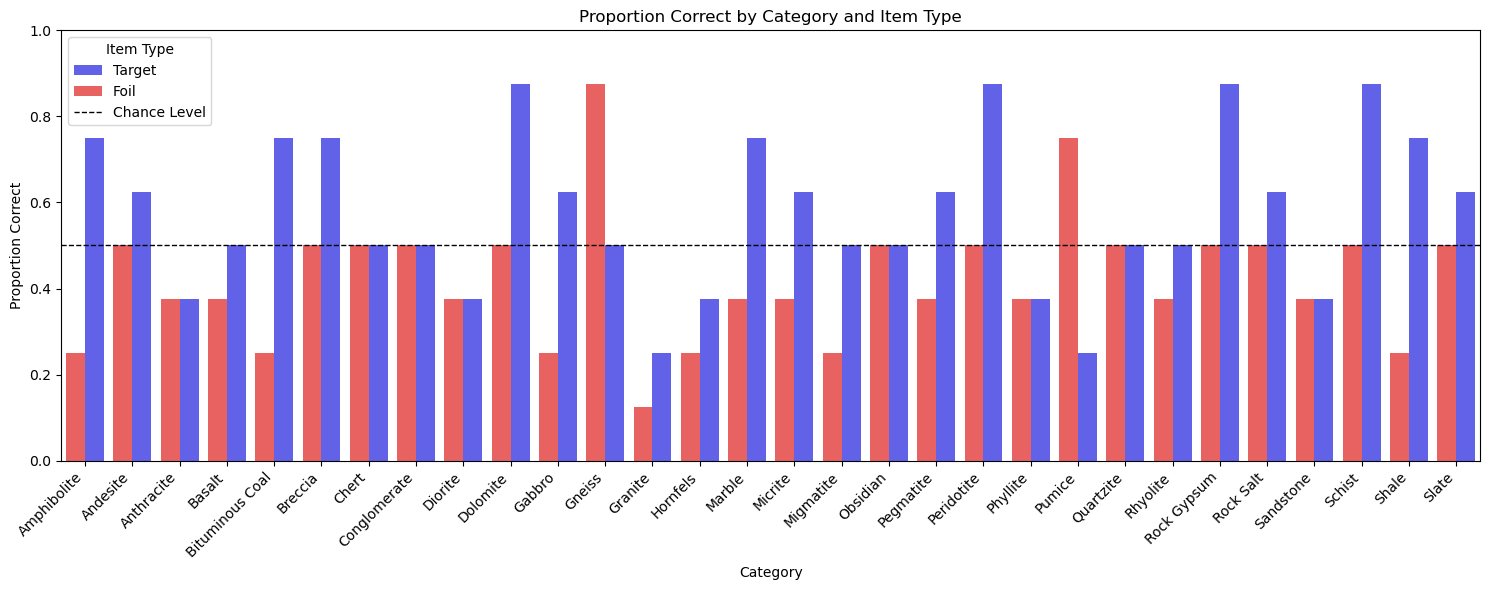

In [120]:
plt.figure(figsize=(15,6))
sns.barplot(
    data=gr_cat_df_long,
    x="category_name",
    y="prop_correct",
    hue="item_type",
    palette=["red","blue"],
    alpha=0.7
)
plt.axhline(0.5, color='black', linestyle='--', linewidth=1, label='Chance Level')

plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)
plt.xlabel("Category")
plt.ylabel("Proportion Correct")

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[i] for i in [1,0,2]], 
           ['Target', 'Foil', 'Chance Level'],
           loc='upper left', title='Item Type')

plt.title("Proportion Correct by Category and Item Type")
plt.tight_layout()
plt.show()

In [129]:
# Save only the variables you actually need
variables_to_save = {
    'gr_cat_df_long': gr_cat_df_long,
    'filtered_data_memory': filtered_data_memory,
    'filtered_data_test': filtered_data_test,
    'data_set': data_set,
    # Add other variables you want to keep
}

with open("Exp1_analysis.pkl", "wb") as f:
    dill.dump(variables_to_save, f)